In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('avocado.csv')

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [35]:
df_2 = df.query('year == 2015')[['Date', 'Total Bags', 'Small Bags']]

In [36]:
df_2.head()

,Date,Total Bags,Small Bags
0,2015-12-27,8696.87,8603.62
1,2015-12-20,9505.56,9408.07
2,2015-12-13,8145.35,8042.21
3,2015-12-06,5811.16,5677.40
4,2015-11-29,6183.95,5986.26


In [37]:
df_2_melted = pd.melt(df_2, id_vars='Date', value_vars=['Total Bags', 'Small Bags'], var_name ='Bags', value_name='Count')

In [38]:
df_2_melted

,Date,Bags,Count
0,2015-12-27,Total Bags,8696.87
1,2015-12-20,Total Bags,9505.56
2,2015-12-13,Total Bags,8145.35
3,2015-12-06,Total Bags,5811.16
4,2015-11-29,Total Bags,6183.95
...,...,...,...
11225,2015-02-01,Small Bags,2563.33
11226,2015-01-25,Small Bags,2320.00
11227,2015-01-18,Small Bags,1620.00
11228,2015-01-11,Small Bags,2656.66


C:\Users\Crispy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


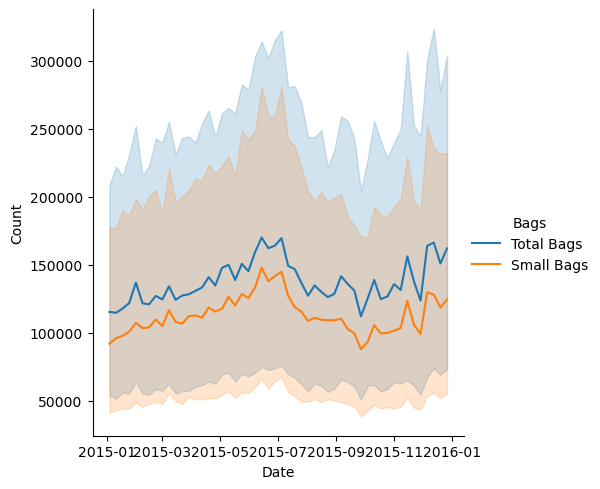

In [39]:
sns.relplot(data=df_2_melted, kind='line',x='Date', y='Count', hue='Bags')

In [29]:
pd.qcut(df, q=4, labels = ['Poor','Modest','Good','Excellent'])

ValueError: Input array must be 1 dimensional

In [59]:
df_3 = df.query('year == 2015')[['year', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [60]:
df_3_melted = pd.melt(df_3, id_vars='year', value_vars=['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' ], var_name ='Bags', value_name='Count')

In [61]:
df_3_melted

,year,Bags,Count
0,2015,Total Bags,8696.87
1,2015,Total Bags,9505.56
2,2015,Total Bags,8145.35
3,2015,Total Bags,5811.16
4,2015,Total Bags,6183.95
...,...,...,...
22455,2015,XLarge Bags,0.00
22456,2015,XLarge Bags,0.00
22457,2015,XLarge Bags,0.00
22458,2015,XLarge Bags,0.00


sns.relplot(data=df_3_melted, kind='line',x='year', y='Count', hue='Bags')

## Small Bags Sell the Best